# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    n = X_train.shape[0]
    num_pos = (Y_train == 1).sum()
    num_neg = n - num_pos
    X_train_pos = np.zeros((num_pos, 2))
    X_train_neg = np.zeros((num_neg, 2))
    a = num_pos/(num_neg + num_pos)

    p_c = 0
    n_c = 0
    for i in range(n):
        if Y_train[i] == 1:
            X_train_pos[p_c] = X_train[i]
            p_c += 1
        else:
            X_train_neg[n_c] = X_train[i]
            n_c += 1

    mu_pos = np.sum(X_train_pos, axis=0)/num_pos
    mu_neg = np.sum(X_train_neg, axis=0)/num_neg

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    w = mu_neg - mu_pos
    b = (np.dot(mu_pos, mu_pos) - np.dot(mu_neg, mu_neg))*0.5

    for i in range(m):
        temp = np.dot(w, X_test[i]) + b
        Y_test_pred[i] = np.sign(a/(a + (1 - a)*np.exp(temp)) - 0.5)

    return Y_test_pred


def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_pos = (Y_train == 1).sum()
    num_neg = n - num_pos
    X_train_pos = np.zeros((num_pos, 2))
    X_train_neg = np.zeros((num_neg, 2))
    a = num_pos/(num_neg + num_pos)

    p_c = 0
    n_c = 0
    for i in range(n):
        if Y_train[i] == 1:
            X_train_pos[p_c] = X_train[i]
            p_c += 1
        else:
            X_train_neg[n_c] = X_train[i]
            n_c += 1

    mu_pos = np.sum(X_train_pos, axis=0)/num_pos
    mu_neg = np.sum(X_train_neg, axis=0)/num_neg

    # initialize covarience matrices
    cov = np.zeros((X_train[0].shape[0], X_train[0].shape[0]))

    for i in range(num_pos):
        temp = np.reshape(X_train_pos[i] - mu_pos, (1, d))
        cov += np.dot(temp.T, temp)

    for i in range(num_neg):
        temp = np.reshape(X_train_neg[i] - mu_neg, (1, d))
        cov += np.dot(temp.T, temp)
    cov /= n

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        temp_pos = np.dot(
            np.dot((X_test[i] - mu_pos).T, np.linalg.inv(cov)), X_test[i] - mu_pos)
        temp_neg = np.dot(
            np.dot((X_test[i] - mu_neg).T, np.linalg.inv(cov)), X_test[i] - mu_neg)
        Y_test_pred[i] = np.sign(
            a/(a + (1-a)*np.exp(-0.5*(temp_neg - temp_pos))) - 0.5)

    return Y_test_pred


def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_pos = (Y_train == 1).sum()
    num_neg = n - num_pos
    X_train_pos = np.zeros((num_pos, 2))
    X_train_neg = np.zeros((num_neg, 2))
    a = num_pos/(num_neg + num_pos)

    p_c = 0
    n_c = 0
    for i in range(n):
        if Y_train[i] == 1:
            X_train_pos[p_c] = X_train[i]
            p_c += 1
        else:
            X_train_neg[n_c] = X_train[i]
            n_c += 1

    mu_pos = np.sum(X_train_pos, axis=0)/num_pos
    mu_neg = np.sum(X_train_neg, axis=0)/num_neg

    # initialize covarience matrices
    cov1 = np.zeros((X_train[0].shape[0], X_train[0].shape[0]))
    cov2 = cov1

    for i in range(num_pos):
        temp = np.reshape(X_train_pos[i] - mu_pos, (1, d))
        cov1 += np.dot(temp.T, temp)
    cov1 /= num_pos

    for i in range(num_neg):
        temp = np.reshape(X_train_neg[i] - mu_neg, (1, d))
        cov2 += np.dot(temp.T, temp)
    cov2 /= num_neg

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        temp_pos = np.dot(
            np.dot((X_test[i] - mu_pos).T, np.linalg.inv(cov1)), X_test[i] - mu_pos)
        temp_neg = np.dot(
            np.dot((X_test[i] - mu_neg).T, np.linalg.inv(cov2)), X_test[i] - mu_neg)
        Y_test_pred[i] = np.sign(
            a/(a + (1-a)*np.exp(-0.5*(temp_neg - temp_pos))) - 0.5)

    return Y_test_pred


    
    




In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


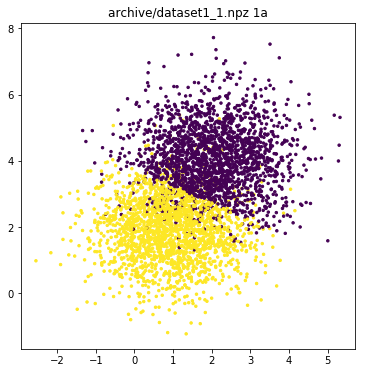

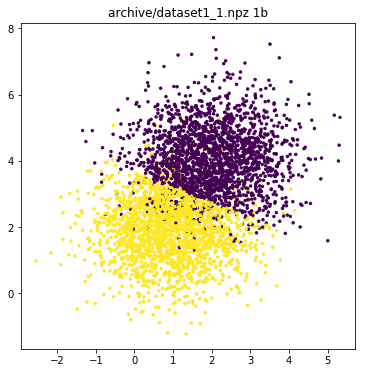

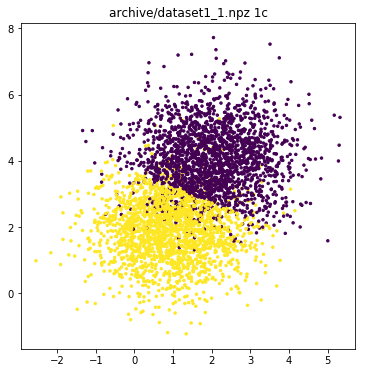

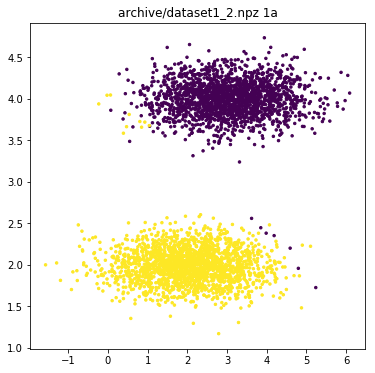

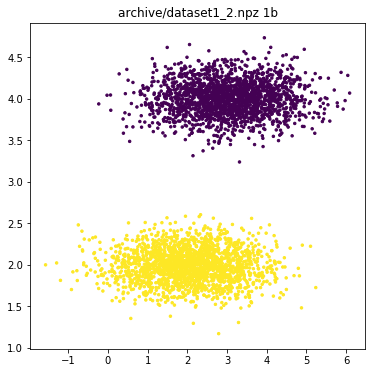

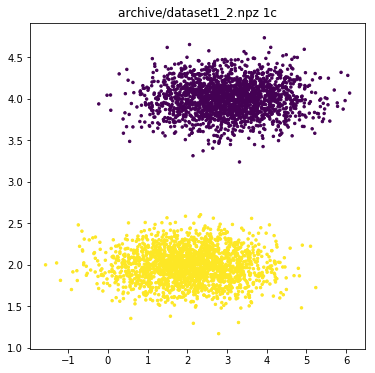

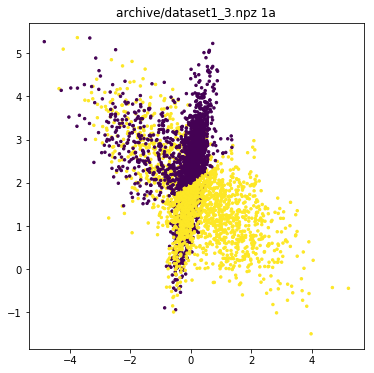

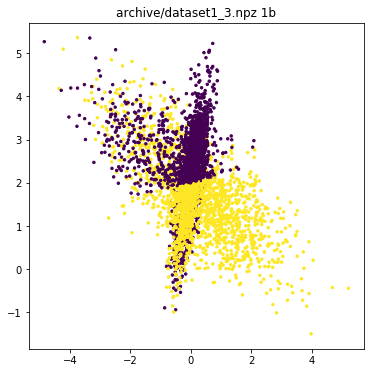

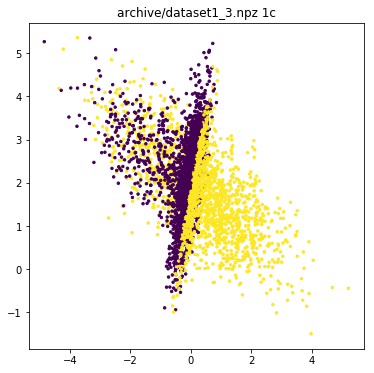

In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
datasets = ['archive/dataset1_1.npz', 'archive/dataset1_2.npz', 'archive/dataset1_3.npz']

for dataset in datasets:
    data = np.load(dataset)
    Y_pred_test_1a = Bayes1a(data['arr_0'], data['arr_1'], data['arr_2'])
    Y_pred_test_1b = Bayes1b(data['arr_0'], data['arr_1'], data['arr_2'])
    Y_pred_test_1c = Bayes1c(data['arr_0'], data['arr_1'], data['arr_2'])
    X = np.concatenate((data['arr_0'][:, 0], data['arr_2'][:, 0]))
    Y = np.concatenate((data['arr_0'][:, 1], data['arr_2'][:, 1]))
    plt.figure(figsize=(6,6))
    plt.scatter(X, Y, c=np.concatenate((data['arr_1'], Y_pred_test_1a)), s=6)
    plt.title(dataset + ' 1a')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(X, Y, c=np.concatenate((data['arr_1'], Y_pred_test_1b)), s=6)
    plt.title(dataset + ' 1b')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(X, Y, c=np.concatenate((data['arr_1'], Y_pred_test_1c)), s=6)
    plt.title(dataset + ' 1c')
    plt.show()

    temp1 = 0
    temp2 = 0
    temp3 = 0
    for i in range(Y_pred_test_1a.shape[0]):
        if Y_pred_test_1a[i] == data['arr_3'][i]:
            temp1 += 1
    for i in range(Y_pred_test_1b.shape[0]):
        if Y_pred_test_1b[i] == data['arr_3'][i]:
            temp2 += 1
    for i in range(Y_pred_test_1c.shape[0]):
        if Y_pred_test_1c[i] == data['arr_3'][i]:
            temp3 += 1

    accuracy1a = temp1/Y_pred_test_1a.shape[0]
    accuracy1b = temp2/Y_pred_test_1b.shape[0]
    accuracy1c = temp3/Y_pred_test_1c.shape[0]
#     print(accuracy1a, accuracy1b, accuracy1c)



**problem 1**

| Dataset  | 1a     | 1b     | 1c     |
|----------|--------|--------|--------|
| Dataset1 | 0.874  | 0.8755 | 0.8755 |
| Dataset2 | 0.9915 | 1.0    | 1.0    |
| Dataset3 | 0.503  | 0.505  | 0.527  |

For dataset1, the data is mostly separated to give accuracy of 0.87.
There is not much increase in the accuracy between 'a' and 'b' or 'c'.
because the separation between two variables $\mu_{+},\mu_{-}$ is
sufficient for the data to be well separated.

For dataset2, the data is well separated, and all the three algorithms
classify the data perfectly. Again, there is not much increase in
accuracy between 'a' and 'b' or 'c'.

For dataset3, the data is not separated, and the complexity of the
algorithm plays key role in classifying the data. You can see the
significant increase in the accuracy between 'b' and 'c'. since, c is
more complex algorithm compared to b.




** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [ ]:
# Cell type : CodeWrite
# Fill in functions in this cell


def classify(ita):
    L = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    min = np.dot(L[0], ita)
    ans = 0
    for i in range(1, 4):
        temp = np.dot(L[i], ita)
        if temp < min:
            min = temp
            ans = i
    return ans + 1


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_0 = (Y_train == 1.0).sum()
    num_1 = (Y_train == 2.0).sum()
    num_2 = (Y_train == 3.0).sum()
    num_3 = n - num_0 - num_1 - num_2
    num = np.array([num_0, num_1, num_2, num_3])
    mu = np.zeros((4, d))
    a = np.zeros(4)

    for i in range(4):
        a[i] = num[i]/n

    for i in range(n):
        mu[int(Y_train[i] - 1.0)] += X_train[i]

    for i in range(4):
        mu[i] /= num[i]

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        denom = 0
        for j in range(4):
            denom += np.exp(-0.5 *
                            np.dot(X_test[i] - mu[j], X_test[i] - mu[j])) * a[j]
        ita = np.zeros(4)
        for j in range(4):
            ita[j] = np.exp(-0.5 * np.dot(X_test[i] - mu[j],
                                          X_test[i] - mu[j])) * a[j]/denom
        Y_test_pred[i] = classify(ita)
    return Y_test_pred


def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_0 = (Y_train == 1.0).sum()
    num_1 = (Y_train == 2.0).sum()
    num_2 = (Y_train == 3.0).sum()
    num_3 = n - num_0 - num_1 - num_2
    num = np.array([num_0, num_1, num_2, num_3])
    mu = np.zeros((4, d))
    a = np.zeros(4)
    cov = np.zeros((d, d))

    for i in range(4):
        a[i] = num[i]/n

    for i in range(n):
        mu[int(Y_train[i] - 1.0)] += X_train[i]

    for i in range(4):
        mu[i] /= num[i]

    for i in range(n):
        j = int(Y_train[i] - 1.0)
        temp = np.reshape(X_train[i] - mu[j], (1, d))
        cov += np.dot(temp.T, temp)

    cov /= n

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        denom = 0
        ita = np.zeros(4)
        for j in range(4):
            ita[j] = np.exp(-0.5 * np.dot(np.dot(X_test[i] - mu[j],
                                                 np.linalg.inv(cov)), X_test[i] - mu[j])) * a[j]
            denom += ita[j]

        for j in range(4):
            ita[j] /= denom
        Y_test_pred[i] = classify(ita)
    return Y_test_pred


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_0 = (Y_train == 1.0).sum()
    num_1 = (Y_train == 2.0).sum()
    num_2 = (Y_train == 3.0).sum()
    num_3 = n - num_0 - num_1 - num_2
    num = np.array([num_0, num_1, num_2, num_3])
    mu = np.zeros((4, d))
    a = np.zeros(4)
    cov = np.zeros((4, d, d))

    for i in range(4):
        a[i] = num[i]/n

    for i in range(n):
        mu[int(Y_train[i] - 1.0)] += X_train[i]

    for i in range(4):
        mu[i] /= num[i]

    for i in range(n):
        j = int(Y_train[i] - 1.0)
        temp = np.reshape(X_train[i] - mu[j], (1, d))
        cov[j] += np.dot(temp.T, temp)

    for i in range(4):
        cov[i] /= num[i]

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        denom = 0
        ita = np.zeros(4)
        for j in range(4):
            ita[j] = np.exp(-0.5 * np.dot(np.dot(X_test[i] - mu[j],
                                                 np.linalg.inv(cov[j])), X_test[i] - mu[j])) * a[j]
            denom += ita[j]

        for j in range(4):
            ita[j] /= denom
        Y_test_pred[i] = classify(ita)
    return Y_test_pred

    
    


    


In [ ]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


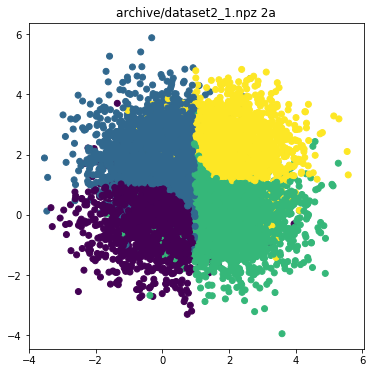

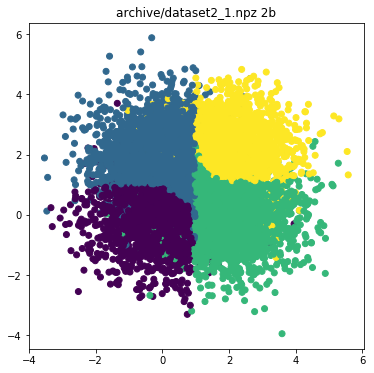

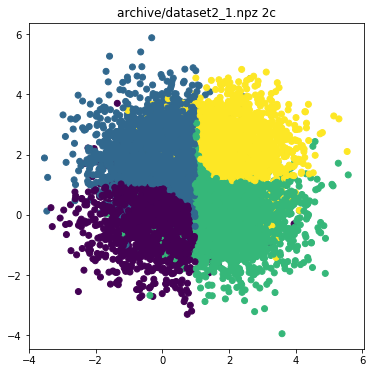

0.699 0.7 0.69975


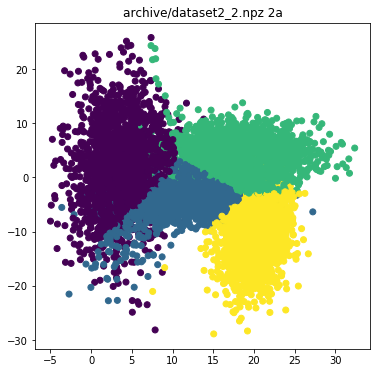

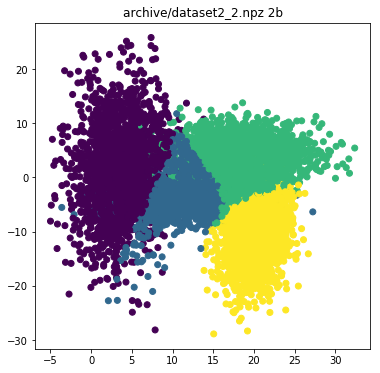

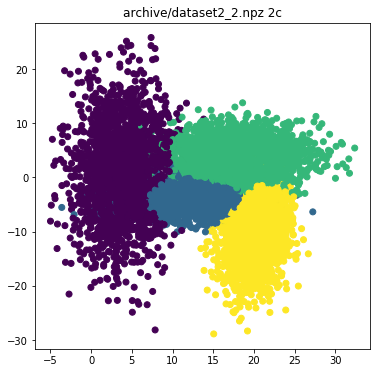

0.8545 0.83475 0.88575


In [ ]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

datasets = ['archive/dataset2_1.npz', 'archive/dataset2_2.npz']

for dataset in datasets:
    data = np.load(dataset)
    Y_pred_test_2a = Bayes2a(data['arr_0'], data['arr_1'], data['arr_2'])
    Y_pred_test_2b = Bayes2b(data['arr_0'], data['arr_1'], data['arr_2'])
    Y_pred_test_2c = Bayes2c(data['arr_0'], data['arr_1'], data['arr_2'])

    X = np.concatenate((data['arr_0'][:,0],data['arr_2'][:,0]))
    Y = np.concatenate((data['arr_0'][:,1],data['arr_2'][:,1]))

    plt.figure(figsize=(6,6))
    plt.scatter(X,Y,c=np.concatenate((data['arr_1'],Y_pred_test_2a)))
    plt.title(dataset + ' 2a')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(X,Y,c=np.concatenate((data['arr_1'],Y_pred_test_2b)))
    plt.title(dataset + ' 2b')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(X,Y,c=np.concatenate((data['arr_1'],Y_pred_test_2c)))
    plt.title(dataset + ' 2c')
    plt.show()
    temp1 = 0
    temp2 = 0
    temp3 = 0
    for i in range(Y_pred_test_2a.shape[0]):
        if Y_pred_test_2a[i] == data['arr_3'][i]:
            temp1 += 1
    for i in range(Y_pred_test_2b.shape[0]):
        if Y_pred_test_2b[i] == data['arr_3'][i]:
            temp2 += 1
    for i in range(Y_pred_test_2c.shape[0]):
        if Y_pred_test_2c[i] == data['arr_3'][i]:
            temp3 += 1

    accuracy1a = temp1/Y_pred_test_2a.shape[0]
    accuracy1b = temp2/Y_pred_test_2b.shape[0]
    accuracy1c = temp3/Y_pred_test_2c.shape[0]
#     print(accuracy1a, accuracy1b, accuracy1c)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

| Dataset  | 2a     | 2b      | 2c      |
|----------|--------|---------|---------|
| Dataset1 | 0.699  | 0.7     | 0.69975 |
| Dataset2 | 0.8545 | 0.83475 | 0.88575 |

For dataset 2, since the accuracy is higher in '2a' the probable
covariance matrix is nearer to $I$. Since the data is limited 2a wins
against the other two.




**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Repeat for 100 times, and estimate the bias and variance for all 30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms (corresponding to 5 degrees and 6 lambda values) analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. 

3b) In the next text cell, give the Bias and Variance computed as a $5\times 6$ matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




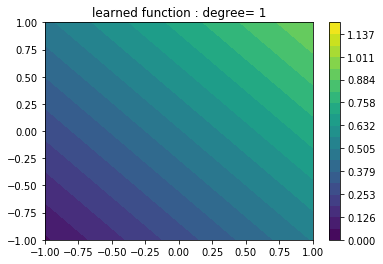

Degree= 1 lambda= 1e-09
Bias = 0.26787665667382704
Variance = 0.003468987362034044
MSE = 0.06828891584707436


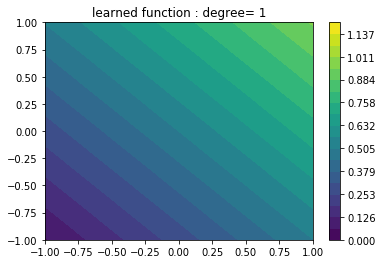

Degree= 1 lambda= 1e-07
Bias = 0.23645111620536435
Variance = 0.0005990674504681014
MSE = 0.05531006454494465


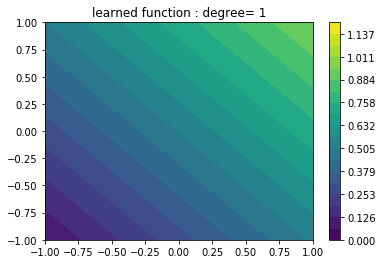

Degree= 1 lambda= 1e-05
Bias = 0.2687445632234193
Variance = 0.003502223207786098
MSE = 0.06872110007484915


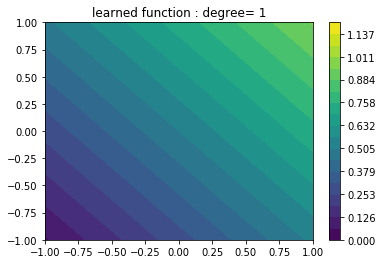

Degree= 1 lambda= 0.001
Bias = 0.19779055758889616
Variance = 0.0006744192264197661
MSE = 0.03842956907022125


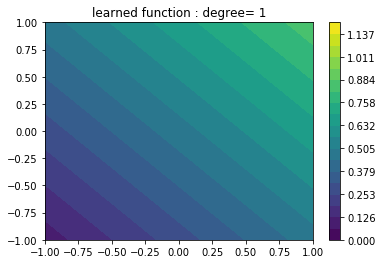

Degree= 1 lambda= 0.1
Bias = 0.21407074102930285
Variance = 0.0025270188676078543
MSE = 0.038847676331593146


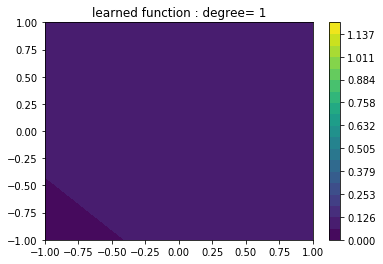

Degree= 1 lambda= 10.0
Bias = 0.5340145170783626
Variance = 4.268130423689606e-05
MSE = 0.2810720028547934


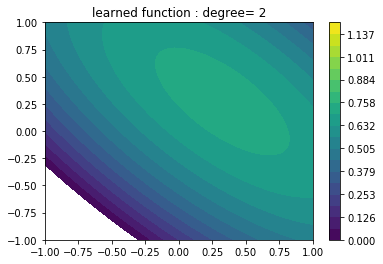

Degree= 2 lambda= 1e-09
Bias = 0.16435319027027526
Variance = 0.004347963958610321
MSE = 0.02266400696583408


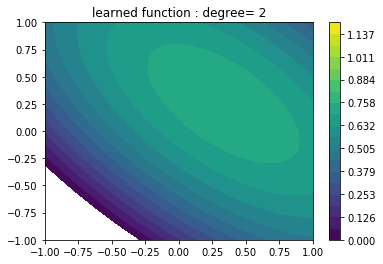

Degree= 2 lambda= 1e-07
Bias = 0.18043995919642697
Variance = 0.006621379396742724
MSE = 0.025937175457424036


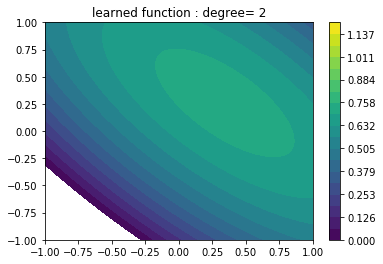

Degree= 2 lambda= 1e-05
Bias = 0.18744333729212762
Variance = 0.005220043204877508
MSE = 0.029913599527200116


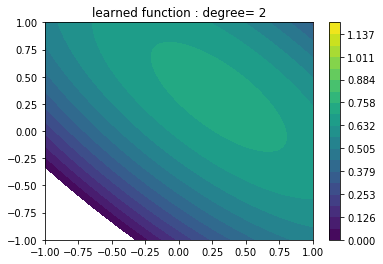

Degree= 2 lambda= 0.001
Bias = 0.1784998164970711
Variance = 0.0016097212093521096
MSE = 0.030225902006737703


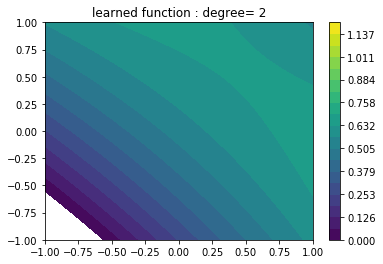

Degree= 2 lambda= 0.1
Bias = 0.2128286889174044
Variance = 0.000679497513662867
MSE = 0.041562380540386634


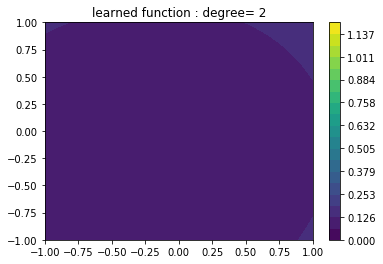

Degree= 2 lambda= 10.0
Bias = 0.44771104322486693
Variance = 4.857600306042743e-05
MSE = 0.20483209036847963


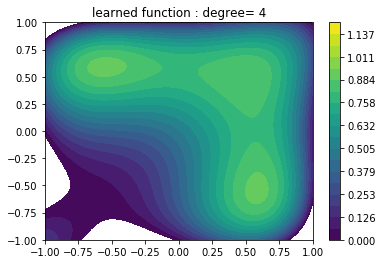

Degree= 4 lambda= 1e-09
Bias = 0.07205206299680196
Variance = 0.0017020283748323864
MSE = 0.0034894700096528147


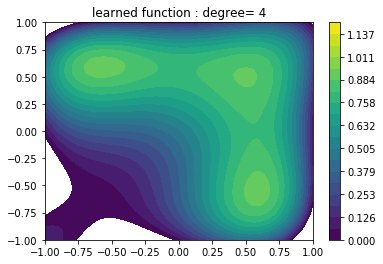

Degree= 4 lambda= 1e-07
Bias = 0.07135915540839179
Variance = 0.0024336362006230367
MSE = 0.0026583638697312336


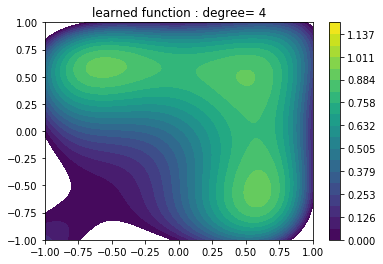

Degree= 4 lambda= 1e-05
Bias = 0.08225022623708238
Variance = 0.0027329061858468147
MSE = 0.0040381900121116135


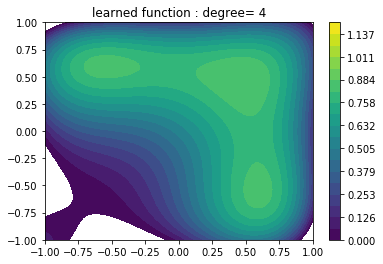

Degree= 4 lambda= 0.001
Bias = 0.06900623017595359
Variance = 0.0014755197282429232
MSE = 0.002664948339122663


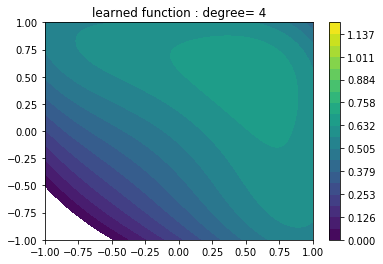

Degree= 4 lambda= 0.1
Bias = 0.1998836770455327
Variance = 0.001839941119604719
MSE = 0.03439789187960124


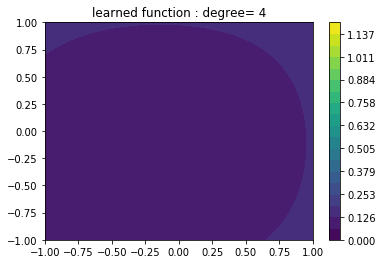

Degree= 4 lambda= 10.0
Bias = 0.5287165939355061
Variance = 0.00015174805944770316
MSE = 0.2683229344924493


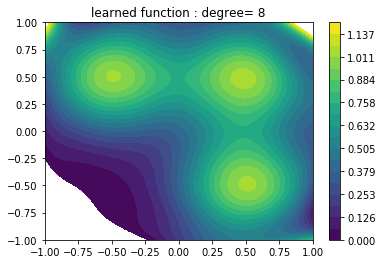

Degree= 8 lambda= 1e-09
Bias = 0.12255674195933608
Variance = 0.01501845011920681
MSE = 1.298626344001665e-06


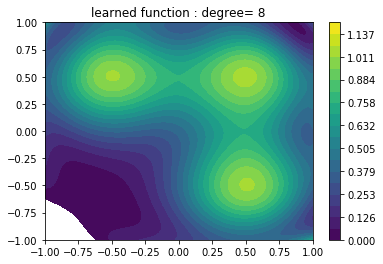

Degree= 8 lambda= 1e-07
Bias = 0.06646770057142362
Variance = 0.004407998519579132
MSE = 5.455070640323949e-06


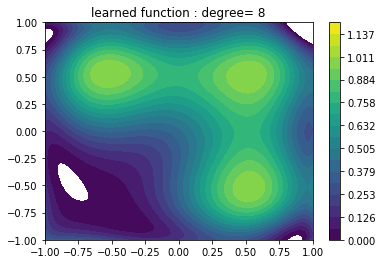

Degree= 8 lambda= 1e-05
Bias = 0.06576756669391753
Variance = 0.003992863748052247
MSE = 0.00015603289072454966


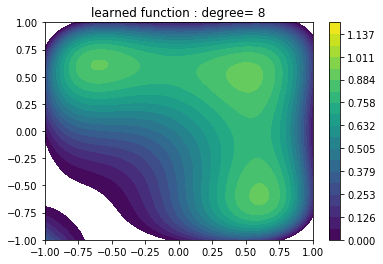

Degree= 8 lambda= 0.001
Bias = 0.06966045290730354
Variance = 0.0010437750939328427
MSE = 0.0031061937574131406


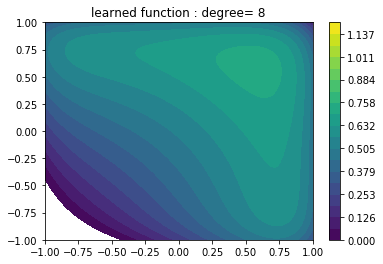

Degree= 8 lambda= 0.1
Bias = 0.15035379500284082
Variance = 0.002450763064065402
MSE = 0.017419135835171698


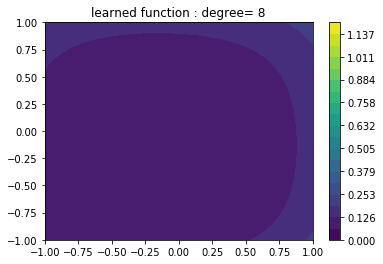

Degree= 8 lambda= 10.0
Bias = 0.5460312738551066
Variance = 0.00043448473907873653
MSE = 0.2803396688664862


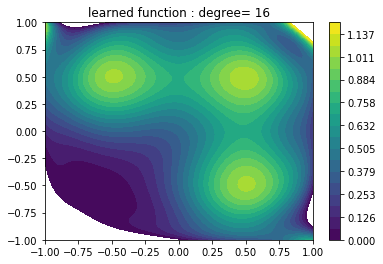

Degree= 16 lambda= 1e-09
Bias = 0.12100388509210586
Variance = 0.014641901979795863
MSE = 1.7429886298934681e-09


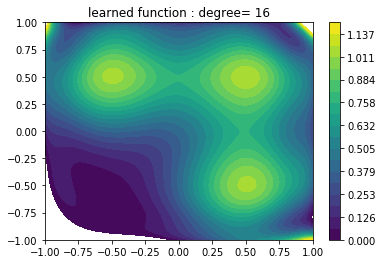

Degree= 16 lambda= 1e-07
Bias = 0.058662880618777696
Variance = 0.003435611866429309
MSE = 2.186517885474705e-06


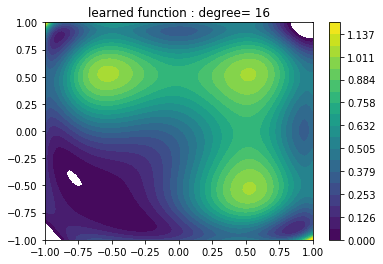

Degree= 16 lambda= 1e-05
Bias = 0.048823172324919485
Variance = 0.0022062806895491453
MSE = 9.064294128674492e-05


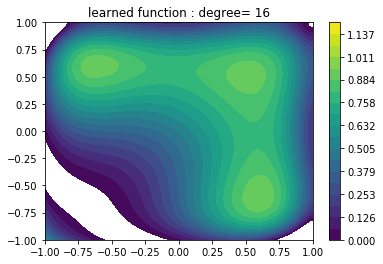

Degree= 16 lambda= 0.001
Bias = 0.11728239912987823
Variance = 0.011039772200930935
MSE = 0.002456616414754002


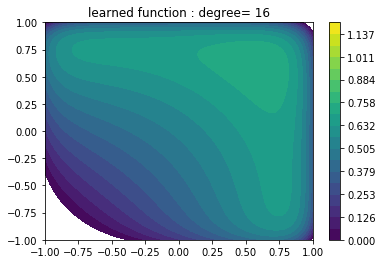

Degree= 16 lambda= 0.1
Bias = 0.15493866379601914
Variance = 0.0017370809881829324
MSE = 0.01894014229452315


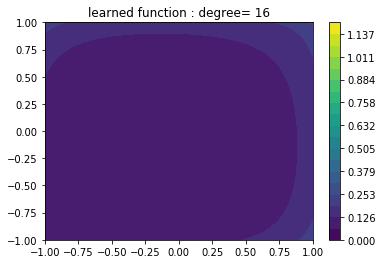

Degree= 16 lambda= 10.0
Bias = 0.5227790616987544
Variance = 0.0003022217845125539
MSE = 0.2626264986307842


In [ ]:
# Cell type : CodeWrite

def phi(x, degree):
    phi = np.zeros(int((degree + 1)*(degree + 2)/2))
    count = 0
    for d in range(degree + 1):
        for i in range(d + 1):
            phi[count] = x[0]**i * x[1]**(d - i)
            count += 1
    return phi


def f(x):
    a = np.array([0.5, 0.5])
    b = np.array([-0.5, 0.5])
    c = np.array([0.5, -0.5])

    return np.exp(-4 * np.dot(x - a, x - a)) + np.exp(-4 * np.dot(x - b, x - b)) + np.exp(-4 * np.dot(x - c, x - c))


def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)

    """
    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        Y_test_pred[i] = np.dot(wt_vector, phi(X_test[i], degree))

    return Y_test_pred


def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.

    """
    X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = np.dot(wt_vector, phi(point, degree))

    plt.contourf(X, Y, Z, levels=np.linspace(0., 1.2, 20))
    plt.title('learned function : degree= ' + str(degree) + title)
    plt.colorbar()
    plt.show()


def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'

    """
    n = X_train.shape[0]
    Phi = np.zeros((n, int((degree + 1)*(degree + 2)/2)))

    for i in range(n):
        Phi[i] = phi(X_train[i], degree)

    temp1 = np.linalg.inv(
        np.dot(Phi.T, Phi) + n/2 * reg_param * np.identity(int((degree + 1)*(degree + 2)/2)))
    temp2 = np.dot(Phi.T, Y_train)
    wt_vector = np.dot(temp1, temp2)
    return wt_vector


def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.

    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.

    In total 4 subplots in one plot with appropriate title including degree and lambda value.

    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.

    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)

    Also return bias, variance, mean squared error. """
    # g is expectation of f_s
    g = np.zeros(int((degree + 1)*(degree + 2)/2))
    X_train = 2 * np.random.rand(num_training_samples, 2) - 1
    Y_train = list(map(f, X_train))
    fs = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)

    # for computing g (the average)
    for i in range(100):
        X_train = 2 * np.random.rand(num_training_samples, 2) - 1
        Y_train = list(map(f, X_train))
        fs = polynomial_regression_ridge_train(
            X_train, Y_train, degree, reg_param)
        g += fs
    g /= 100

    bias_sqr = 0
    for i in range(num_training_samples):
        temp = f(X_train[i]) - np.dot(g, phi(X_train[i], degree))
        bias_sqr += temp * temp
    bias_sqr /= num_training_samples

    var = 0
    for i in range(num_training_samples):
        temp = np.dot(g, phi(X_train[i], degree)) - \
            np.dot(fs, phi(X_train[i], degree))
        var += temp * temp
    var /= num_training_samples

    mse = 0
    for i in range(num_training_samples):
        temp = f(X_train[i]) - np.dot(fs, phi(X_train[i], degree))
        mse += temp * temp
    mse /= num_training_samples

    visualise_polynomial_2d(g, degree)

    return np.sqrt(bias_sqr), var, mse

for degree in [1,2,4,8,16]:
    for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

In [ ]:
# Cell type: convenience



**Problem 3**:

| Size = 100   | 1                 | 2                 | 4                 | 8                 | 16               |
|--------------|-------------------|-------------------|-------------------|-------------------|------------------|
| $$10^{- 9}$$ | 0.191 0.005 0.031 | 0.187 0.004 0.03  | 0.127 0.01 0.007  | 0.034 0.001 0.0   | 0.191 0.036 0.0  |
| $$10^{- 7}$$ | 0.221 0.0 0.048   | 0.189 0.004 0.032 | 0.071 0.002 0.003 | 0.071 0.005 0.0   | 0.09 0.008 0.0   |
| $$10^{- 5}$$ | 0.221 0.001 0.048 | 0.208 0.003 0.04  | 0.076 0.002 0.003 | 0.028 0.001 0.0   | 0.135 0.018 0.0  |
| $$10^{- 3}$$ | 0.227 0.002 0.05  | 0.186 0.006 0.028 | 0.081 0.001 0.005 | 0.081 0.004 0.002 | 0.12 0.012 0.002 |
| $$10^{- 1}$$ | 0.236 0.002 0.055 | 0.205 0.001 0.04  | 0.22 0.004 0.037  | 0.174 0.002 0.025 | 0.145 0.002 0.02 |
| $$10$$       | 0.581 0.0 0.321   | 0.502 0.0 0.254   | 0.525 0.0 0.268   | 0.535 0.0 0.279   | 0.458 0.0 0.216  |

In the above table, each triplet is bias variance and mean square error
respectively.

In each row, as the degree of the polynomial increases,

Bias decreases

Variance increases

Error is negligible.


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using three different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter. 

In the next codewrite cell, for each training set size compute how the train and test squared error varies with degree (by changing $\phi$) and regularisation parameter (changing $\lambda$). Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title including the hyperparameters. Total number of figures = 4 (one for each training set size.)

Summarise your findings in the next tex cell in a few sentences. And reproduce the tables showing train and test error for various training sizes, with appropriate row and column names. (4 tables of train error of size 6x5 and 4 tables of test error of size 6x5).




In [ ]:
# Cell type : CodeWrite 
def error(degree, reg_param, X_train, Y_train):
    # g is expectation of f_s
    g = np.zeros(int((degree + 1)*(degree + 2)/2))
    fs = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)

    # for computing g (the average)
    for i in range(100):
        X_train = 2 * np.random.rand(num_training_samples, 2) - 1
        Y_train = list(map(f, X_train))
        fs = polynomial_regression_ridge_train(
            X_train, Y_train, degree, reg_param)
        g += fs
    g /= 100

    mse = 0
    for i in range(num_training_samples):
        temp = f(X_train[i]) - np.dot(fs, phi(X_train[i], degree))
        mse += temp * temp + reg_param/2 * np.dot(fs, fs)
    mse /= num_training_samples

    # visualise_polynomial_2d(g, degree)

    return mse


data = np.load('archive/dataset4_1.npz')

for num_training_samples in [50, 100, 200, 1000]:
    for degree in [1, 2, 4, 8, 16]:
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            plt.figure()
            e = error(degree, reg_param, data['arr_0'][0:num_training_samples + 1],
                      data['arr_1'][0:num_training_samples + 1])
            print(e)
        print()
    print()

0.05804374781063617
0.04673055914400833
0.037568212628643696
0.03580881764849322
0.04710612253492484
0.27242861751263797

0.02803491855939147
0.03387603218362707
0.02568288688083583
0.02770893488969756
0.050407069959553456
0.255962528004345

0.0036486061571929305
0.003632650719796061
0.004931686774586711
0.005791770480343453
0.053047346124819914


**Problem** 4:

Degree indicates the complexity of the algorithm i.e. more bias. We can
clearly see that error decreases as the degree increases. In all the
four tables. But that is not the case with the regularization parameter
$\lambda$.

As $\lambda$ increases it error first decreases and then increases. So,
there exists a $\lambda$ for which the error is minimum.

**With data size**

The error tends to a particular value when the data is sufficiently
large, it fluctuates a lot when the data is less.

| Size = 50    | 1           | 2       | 4       | 8           | 16          |
|--------------|-------------|---------|---------|-------------|-------------|
| $$10^{- 9}$$ | 0.034308002 | 0.03417 | 0.00285 | 1.17E-06    | 1.35E-07    |
| $$10^{- 7}$$ | 0.049850486 | 0.02523 | 0.00312 | 1.33E-05    | 8.97E-06    |
| $$10^{- 5}$$ | 0.060659655 | 0.03008 | 0.00372 | 0.000517901 | 0.00027122  |
| $$10^{- 3}$$ | 0.045261153 | 0.0349  | 0.00686 | 0.006244835 | 0.004446429 |
| $$10^{- 1}$$ | 0.071453352 | 0.05909 | 0.05764 | 0.044971997 | 0.045550811 |
| $$10$$       | 0.347887838 | 0.24483 | 0.2778  | 0.29677588  | 0.305173074 |

| Size = 100   | 1           | 2       | 4       | 8           | 16          |
|--------------|-------------|---------|---------|-------------|-------------|
| $$10^{- 9}$$ | 0.043695186 | 0.03013 | 0.00488 | 4.28E-05    | 5.62E-07    |
| $$10^{- 7}$$ | 0.052683909 | 0.03239 | 0.00525 | 4.40E-05    | 1.91E-05    |
| $$10^{- 5}$$ | 0.04939354  | 0.03268 | 0.0063  | 0.000448675 | 0.000340272 |
| $$10^{- 3}$$ | 0.051191627 | 0.03681 | 0.00677 | 0.006413914 | 0.005137977 |
| $$10^{- 1}$$ | 0.072557277 | 0.0531  | 0.04543 | 0.050109888 | 0.048204197 |
| $$10$$       | 0.273906519 | 0.32247 | 0.25835 | 0.248623267 | 0.294794864 |

| size = 200                     | 1           | 2       | 4       | 8           | 16          |
|--------------------------------|-------------|---------|---------|-------------|-------------|
| $$\mathbf{10}^{\mathbf{- 9}}$$ | 0.064464827 | 0.03368 | 0.00733 | 6.46E-05    | 9.95E-07    |
| $$\mathbf{10}^{\mathbf{- 7}}$$ | 0.057067492 | 0.0336  | 0.00589 | 0.000109199 | 2.11E-05    |
| $$\mathbf{10}^{\mathbf{- 5}}$$ | 0.053510286 | 0.0388  | 0.00539 | 0.000700482 | 0.000398855 |
| $$\mathbf{10}^{\mathbf{- 3}}$$ | 0.048100098 | 0.03233 | 0.0082  | 0.006584106 | 0.005232591 |
| $$\mathbf{10}^{\mathbf{- 1}}$$ | 0.060040998 | 0.06084 | 0.05412 | 0.051747374 | 0.051088836 |
| $$\mathbf{10}$$                | 0.282044352 | 0.28941 | 0.28625 | 0.289127174 | 0.251245462 |

| size = 1000                    | 1           | 2        | 4        | 8           | 16          |
|--------------------------------|-------------|----------|----------|-------------|-------------|
| $$\mathbf{10}^{\mathbf{- 9}}$$ | 0.05326708  | 0.033095 | 0.005806 | 0.000132004 | 1.63E-06    |
| $$\mathbf{10}^{\mathbf{- 7}}$$ | 0.054767608 | 0.034762 | 0.006184 | 0.000134224 | 2.72E-05    |
| $$\mathbf{10}^{\mathbf{- 5}}$$ | 0.052905331 | 0.033575 | 0.006218 | 0.000689306 | 0.000475332 |
| $$\mathbf{10}^{\mathbf{- 3}}$$ | 0.052758151 | 0.035832 | 0.00877  | 0.007078345 | 0.005751879 |
| $$\mathbf{10}^{\mathbf{- 1}}$$ | 0.071529684 | 0.05903  | 0.054853 | 0.05321911  | 0.050834193 |
| $$\mathbf{10}$$                | 0.288818618 | 0.286704 | 0.284781 | 0.279448036 | 0.283429484 |